In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=pd.read_excel("/home/jash/Desktop/prophet/forecast.xlsx")

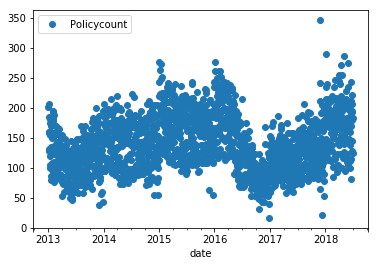

In [3]:
a.plot(x='date', y='Policycount', style='o')
a.rename(columns={'date': 'ds', 'Policycount': 'y'}, inplace = True)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


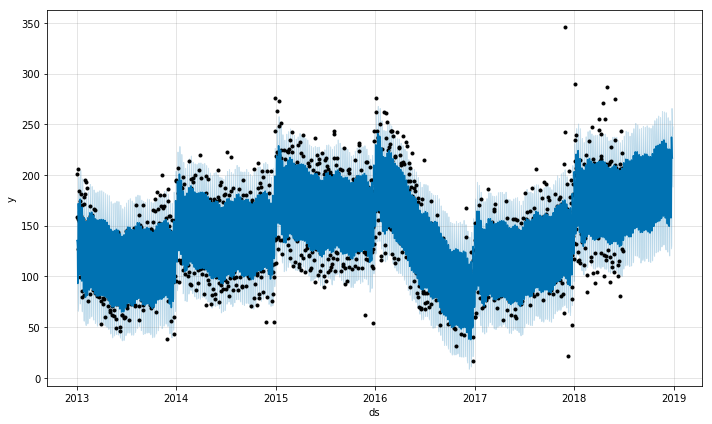

In [4]:
from fbprophet import Prophet
i=Prophet()
i.fit(a)
future=i.make_future_dataframe(periods=180)
forecast1=i.predict(future)
fig1=i.plot(forecast1)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


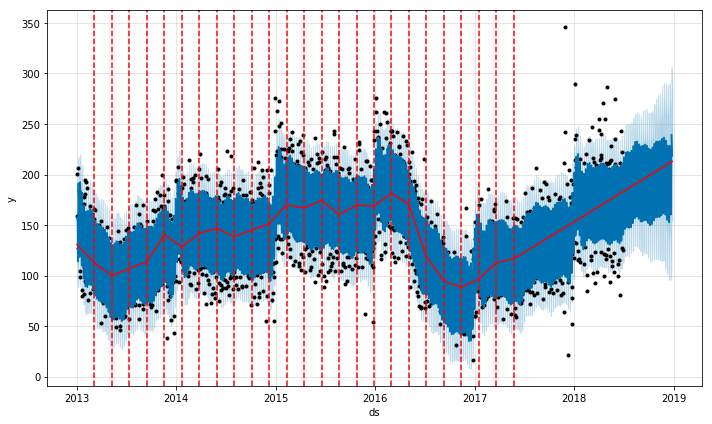

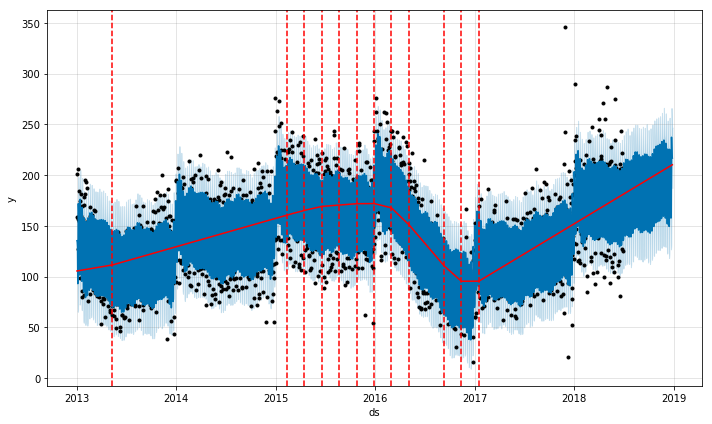

In [5]:
from fbprophet.plot import add_changepoints_to_plot
changed=Prophet(changepoint_prior_scale=100)
changed.fit(a)
future=changed.make_future_dataframe(periods=180)
forecast2=changed.predict(future)
fig=changed.plot(forecast2)
p=add_changepoints_to_plot(fig.gca(),changed,forecast2)


from fbprophet.plot import add_changepoints_to_plot
m=Prophet()
m.fit(a)
future=m.make_future_dataframe(periods=180)
forecast3=m.predict(future)
fig1=m.plot(forecast3)
q=add_changepoints_to_plot(fig1.gca(),m,forecast3)


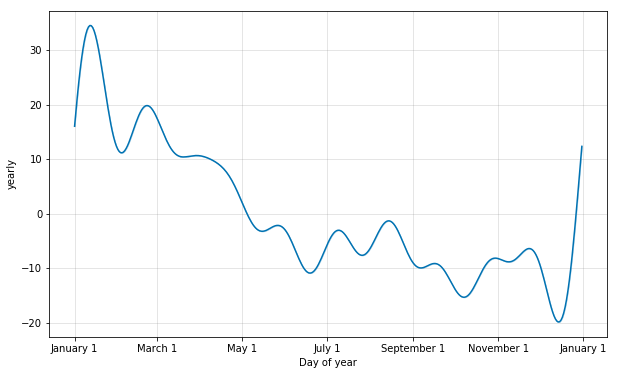

In [9]:
from fbprophet.plot import plot_yearly
j=plot_yearly(m)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


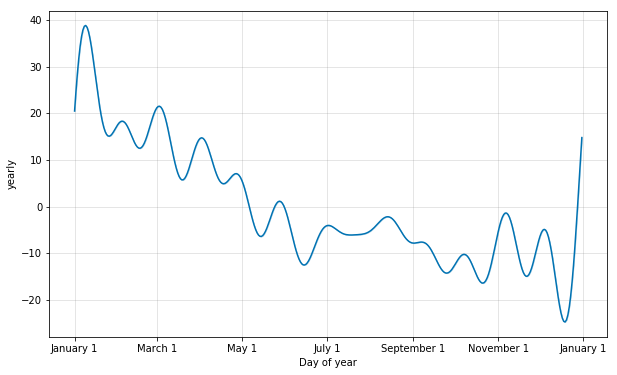

In [11]:
k=Prophet(yearly_seasonality=13).fit(a)
j=plot_yearly(k)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


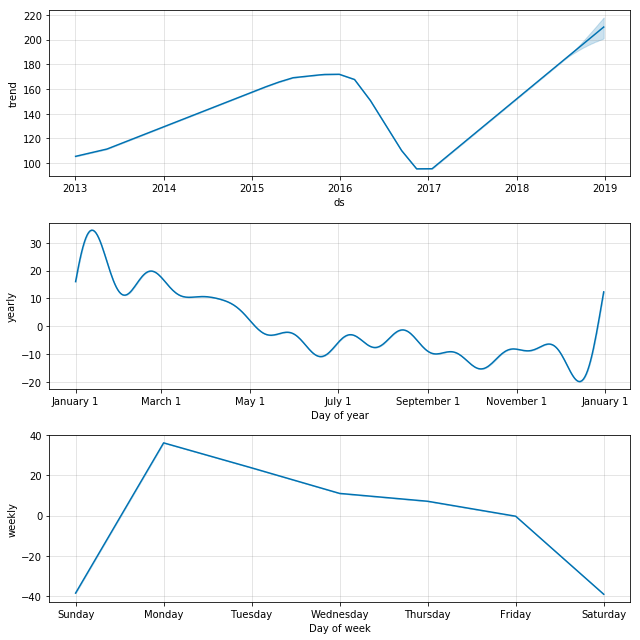

In [16]:
m2= Prophet()


forecast4 = m2.fit(a).predict(future)
fig = m2.plot_components(forecast4)

In [33]:
a.loc[a.loc[:]['y'] > 280]=None

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


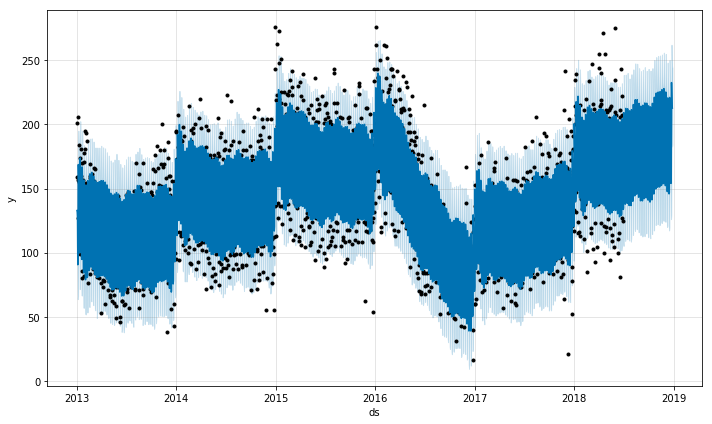

In [35]:
g=Prophet()
model=g.fit(a)
fig=model.plot(model.predict(future))

In [54]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='360 days', period='180 days', horizon = '180 days')


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00


In [59]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1615,2018-06-26,200.739334,172.299330,228.121281,207,2018-01-01
1616,2018-06-27,188.783799,158.369183,217.181199,192,2018-01-01
1617,2018-06-28,183.893850,153.949091,211.091441,194,2018-01-01
1618,2018-06-29,178.247060,148.178809,207.993115,182,2018-01-01
1619,2018-06-30,141.129997,112.924975,168.504983,125,2018-01-01


In [89]:
last6=df_cv.iloc[-181:]

In [116]:
last6 = last6.reset_index(drop=True)
last6.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-01,137.377360,108.986894,165.697828,167,2017-07-05
1,2018-01-02,196.429398,169.174743,222.658593,290,2018-01-01
2,2018-01-03,186.977633,157.245875,215.605120,214,2018-01-01
3,2018-01-04,184.384387,157.865767,210.095995,235,2018-01-01
4,2018-01-05,180.802016,153.003341,209.493748,200,2018-01-01


In [117]:
#calculating mape for the last 6 months
import math
import numpy as np
mape=np.zeros(shape=(len(last6),1))
for i in range(len(last6)):
    mape[i]=math.fabs((last6.iloc[i]['yhat']-last6.loc[i]['y'])/last6.iloc[i]['y'])
    

In [141]:
print "mape for the last 6 months is",np.mean(mape)*100,"percent"

mape for the last 6 months is 13.652302224069846 percent


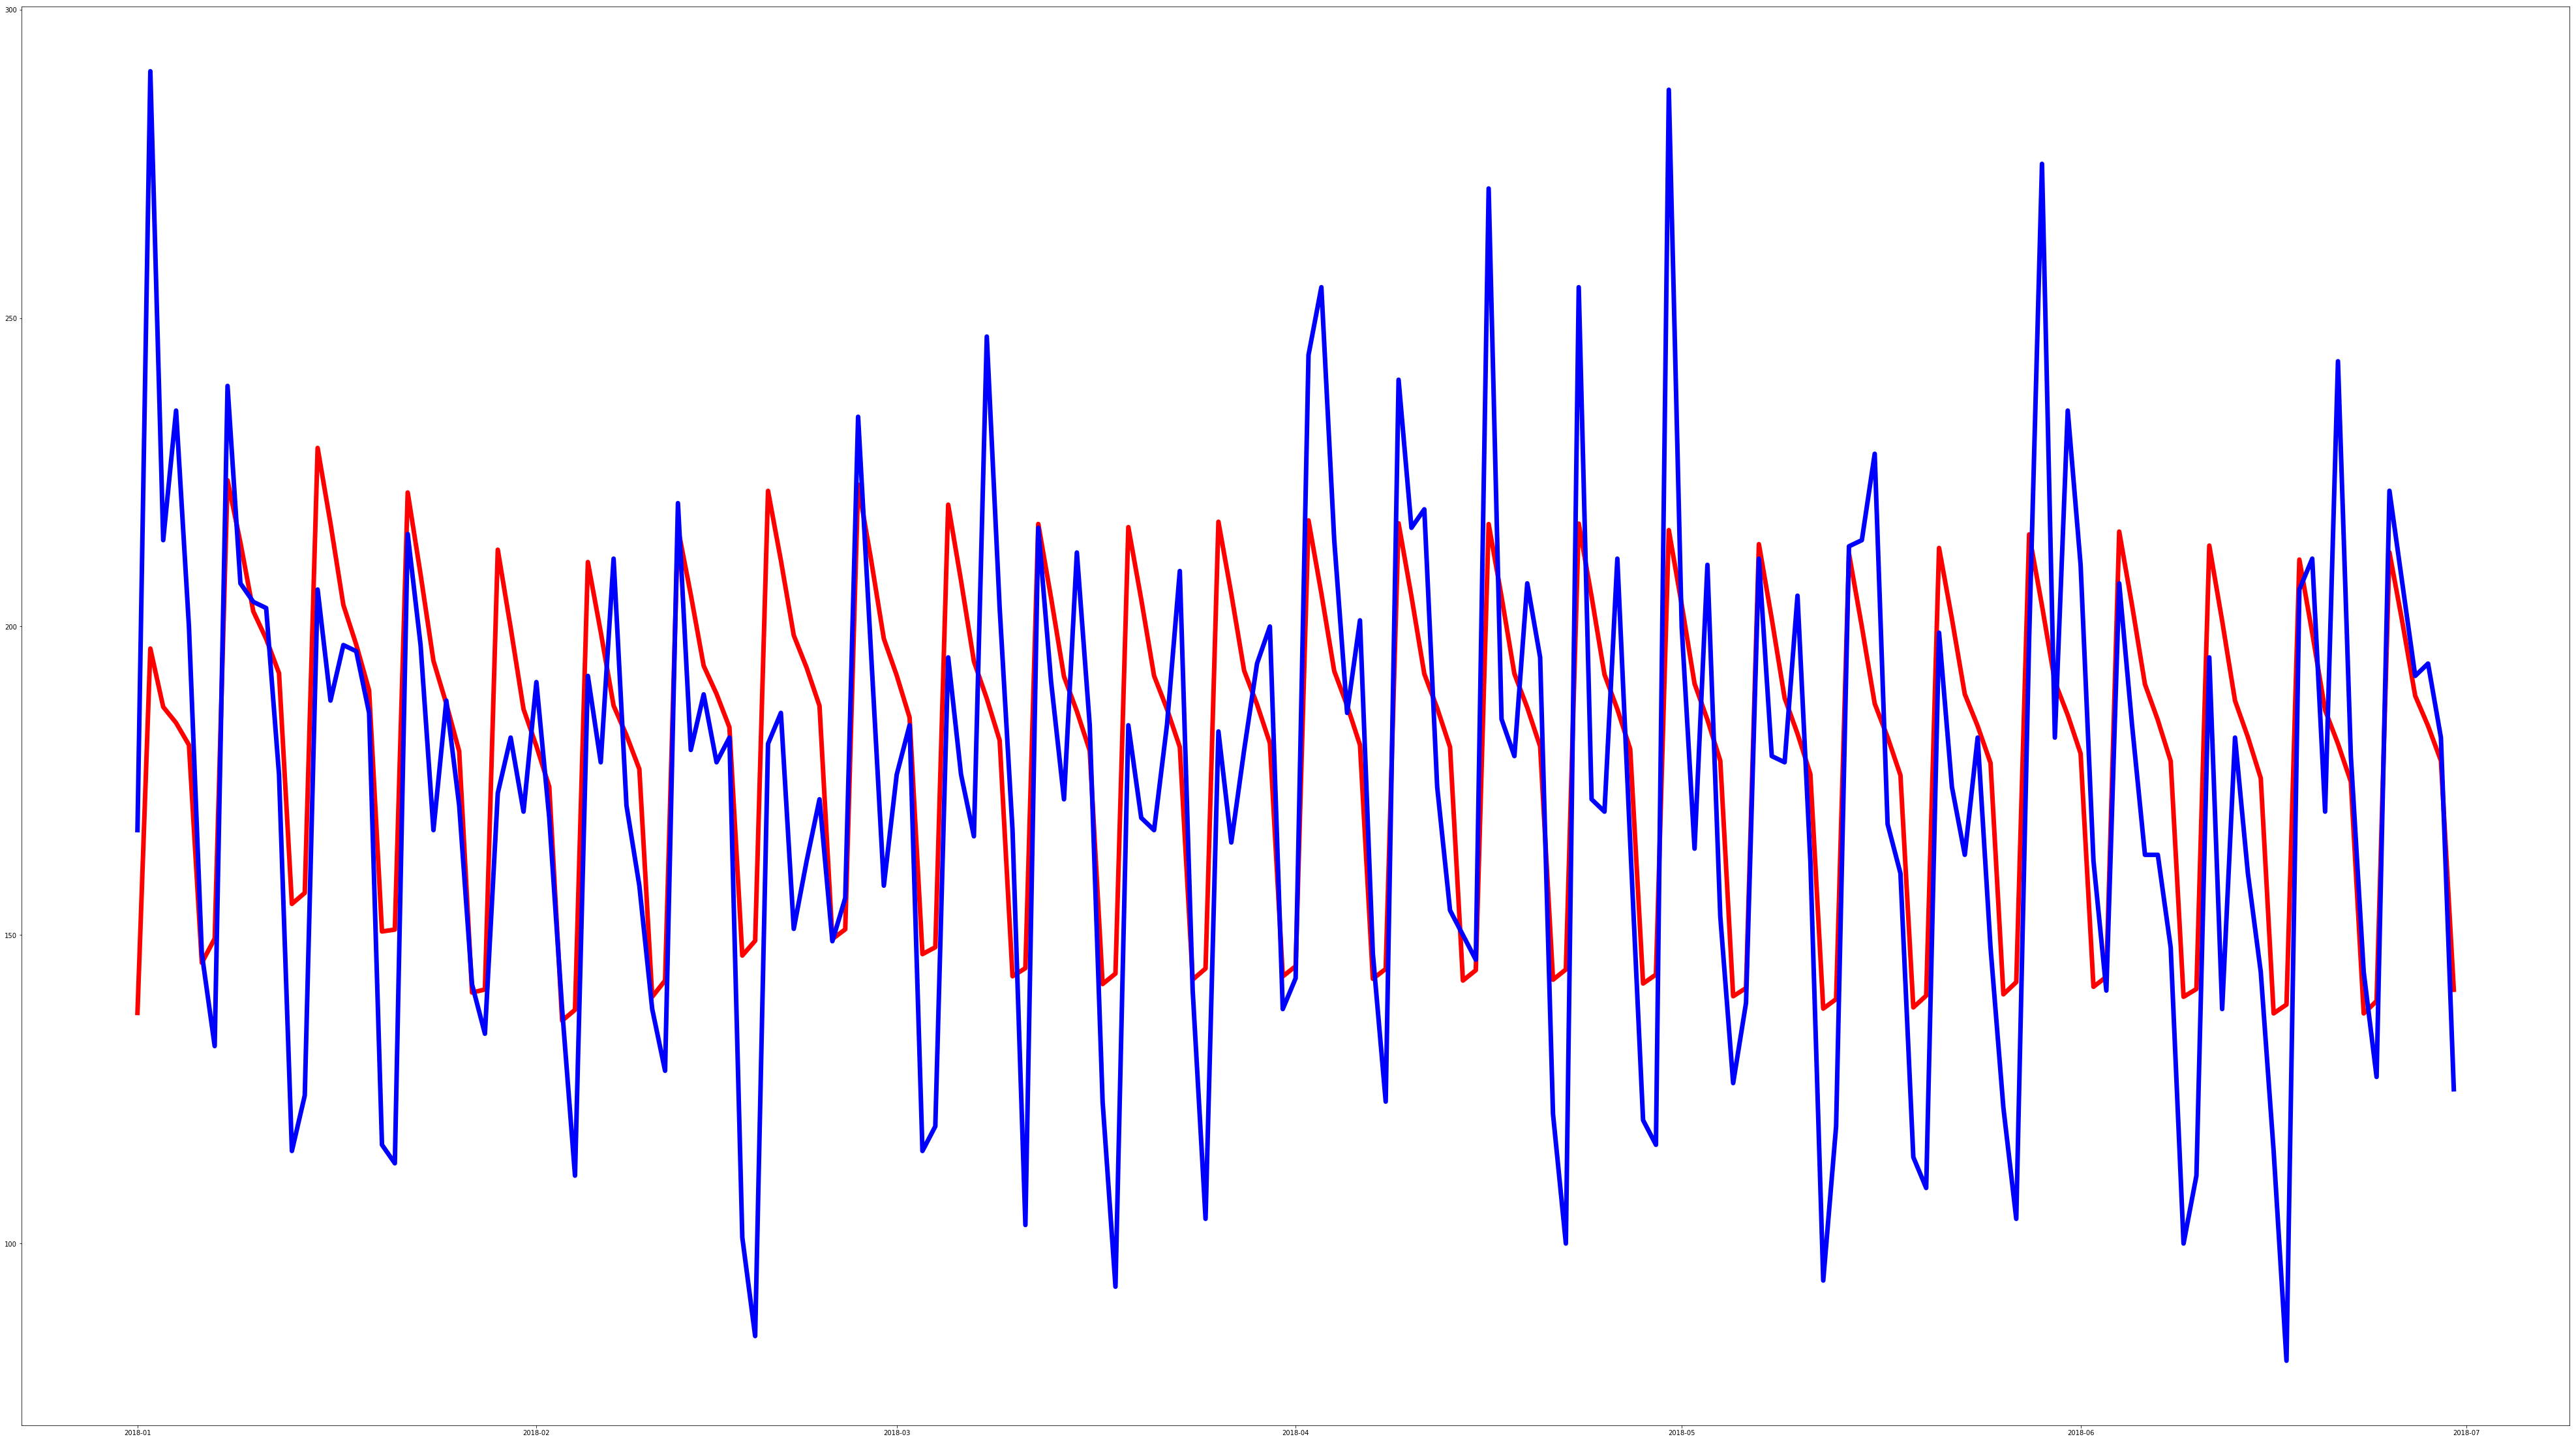

In [142]:
fig=plt.figure(figsize=(70,40))

plt.plot(last6['ds'],last6['yhat'],color='red',linewidth=7)
plt.plot(last6['ds'],last6['y'],color='blue',linewidth=7)


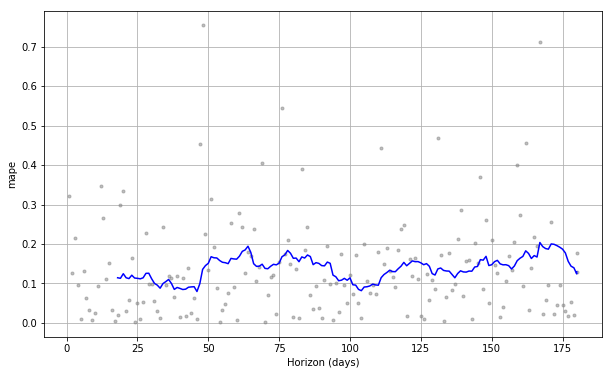

In [143]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(last6, metric='mape')
